In [100]:
from sklearn import tree, datasets, cross_validation, ensemble
import pandas as pd
import numpy as np

In [101]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [53]:
def write_answer(num, answer):
    with open("week4_answer{}.txt".format(num), "w") as fout:
        fout.write(str(answer))

In [16]:
def get_answer(clf):
    scores = cross_validation.cross_val_score(clf, digits.data, digits.target, cv=10)
    return scores.mean()

In [3]:
digits = datasets.load_digits()

In [4]:
X = pd.DataFrame(digits.data)
y = pd.DataFrame(digits.target).rename(columns={0 : 'target'})

In [5]:
pd.concat([X, y], axis=1).head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


# TASK 1

Создайте DecisionTreeClassifier с настройками по умолчанию и измерьте качество его работы с помощью cross_val_score. Эта величина и будет ответом в пункте 1.

In [6]:
clf = tree.DecisionTreeClassifier()

In [17]:
answer = get_answer(clf)
write_answer(1, answer)
print("Cross_val_score on default tree classifier : {}".format(answer))

Cross_val_score on default tree classifier : 0.9249608176197188


# TASK 2

Воспользуйтесь BaggingClassifier из sklearn.ensemble, чтобы обучить бэггинг над DecisionTreeClassifier. Используйте в BaggingClassifier параметры по умолчанию, задав только количество деревьев равным 100.

Качество классификации новой модели - ответ в пункте 2. Обратите внимание, как соотносится качество работы композиции решающих деревьев с качеством работы одного решающего дерева.

In [78]:
n_estimators = 100
clf = ensemble.BaggingClassifier(n_estimators=n_estimators)

In [13]:
answer = get_answer(clf)
write_answer(2, answer)
print("Cross_val_score using bagging classifier : {}".format(answer))

Cross_val_score using bagging classifier : 0.9249055783090288


# TASK 3

Теперь изучите параметры BaggingClassifier и выберите их такими, чтобы каждый базовый алгоритм обучался не на всех d признаках, а на √d случайных признаков. Качество работы получившегося классификатора - ответ в пункте 3. Корень из числа признаков - часто используемая эвристика в задачах классификации, в задачах регрессии же часто берут число признаков, деленное на три. Но в общем случае ничто не мешает вам выбирать любое другое число случайных признаков.

In [70]:
max_features = int(digits.data.shape[1] ** (0.5))
max_features

8

In [79]:
clf = ensemble.BaggingClassifier(max_features=max_features, n_estimators=n_estimators)

In [72]:
answer = get_answer(clf)
write_answer(3, answer)
print("Cross_val_score using sqrt(features) : {}".format(answer))

Cross_val_score using sqrt(features) : 0.9332655113488642


# TASK 4

Наконец, давайте попробуем выбирать случайные признаки не один раз на все дерево, а при построении каждой вершины дерева. Сделать это несложно: нужно убрать выбор случайного подмножества признаков в BaggingClassifier и добавить его в DecisionTreeClassifier. Какой параметр за это отвечает, можно понять из документации sklearn, либо просто попробовать угадать (скорее всего, у вас сразу получится). Попробуйте выбирать опять же √d признаков. Качество полученного классификатора на контрольной выборке и будет ответом в пункте 4.

In [80]:
tree_clf = tree.DecisionTreeClassifier(max_features=max_features)
clf = ensemble.BaggingClassifier(base_estimator=tree_clf, n_estimators=n_estimators)

In [77]:
answer = get_answer(clf)
write_answer(4, answer)
print("Cross_val_score using sqrt(features) on every node : {}".format(answer))

Cross_val_score using sqrt(features) on every node : 0.9544902630122933


# TASK 5

Полученный в пункте 4 классификатор - бэггинг на рандомизированных деревьях (в которых при построении каждой вершины выбирается случайное подмножество признаков и разбиение ищется только по ним). Это в точности соответствует алгоритму Random Forest, поэтому почему бы не сравнить качество работы классификатора с RandomForestClassifier из sklearn.ensemble. Сделайте это, а затем изучите, как качество классификации на данном датасете зависит от количества деревьев, количества признаков, выбираемых при построении каждой вершины дерева, а также ограничений на глубину дерева. Для наглядности лучше построить графики зависимости качества от значений параметров, но для сдачи задания это делать не обязательно.

На основе наблюдений выпишите через пробел номера правильных утверждений из приведенных ниже в порядке возрастания номера (это будет ответ в п.5)

1) Случайный лес сильно переобучается с ростом количества деревьев

2) При очень маленьком числе деревьев (5, 10, 15), случайный лес работает хуже, чем при большем числе деревьев

3) С ростом количества деревьев в случайном лесе, в какой-то момент деревьев становится достаточно для высокого качества классификации, а затем качество существенно не меняется.

4) При большом количестве признаков (для данного датасета - 40, 50) качество классификации становится хуже, чем при малом количестве признаков (5, 10). Это связано с тем, что чем меньше признаков выбирается в каждом узле, тем более различными получаются деревья (ведь деревья сильно неустойчивы к изменениям в обучающей выборке), и тем лучше работает их композиция.

5) При большом количестве признаков (40, 50, 60) качество классификации лучше, чем при малом количестве признаков (5, 10). Это связано с тем, что чем больше признаков - тем больше информации об объектах, а значит алгоритм может делать прогнозы более точно.

6) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса намного лучше, чем без ограничения глубины, т.к. деревья получаются не переобученными. С ростом глубины деревьев качество ухудшается.

7) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса заметно хуже, чем без ограничений, т.к. деревья получаются недообученными. С ростом глубины качество сначала улучшается, а затем не меняется существенно, т.к. из-за усреднения прогнозов и различий деревьев их переобученность в бэггинге не сказывается на итоговом качестве (все деревья преобучены по-разному, и при усреднении они компенсируют переобученность друг-друга).

In [81]:
rf_classifier = ensemble.RandomForestClassifier(n_estimators=n_estimators, max_features=max_features)

In [83]:
print(get_answer(rf_classifier))

0.950077894328


## Cross_val_score for random tree forests with different n_estimators

In [110]:
n_estimators_range = np.arange(1, 300, 20)

In [111]:
def get_answers(n_estimators_range):
    clf = None
    answers = []
    for n_estimators in n_estimators_range:
        clf = ensemble.RandomForestClassifier(n_estimators=n_estimators, max_features=max_features)
        answers.append(get_answer(clf))
    return answers

In [112]:
answers = get_answers(n_estimators_range)

In [114]:
len(answers)

15

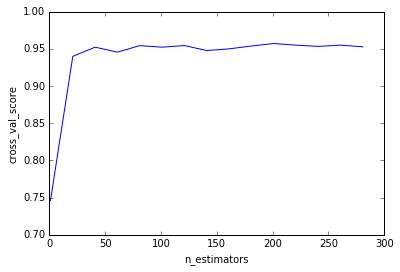

In [115]:
import matplotlib.pyplot as plt
plt.plot(n_estimators_range, answers)
plt.xlabel('n_estimators')
plt.ylabel('cross_val_score')
plt.show()

## Cross_val_score for random tree forests with different max_features

In [129]:
max_features_range = np.arange(1, digits.data.shape[1], 4)

In [130]:
answers = []
clf = ensemble.RandomForestClassifier(n_estimators=n_estimators)
for max_features in max_features_range:
    clf.max_features = max_features
    answers.append(get_answer(clf))

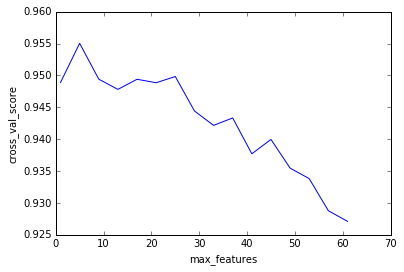

In [131]:
plt.plot(max_features_range, answers)
plt.xlabel('max_features')
plt.ylabel('cross_val_score')
plt.show()

## Cross_val_score for random tree forests with different max_depth

In [136]:
max_depth_range = np.arange(5, 15, 2)

In [137]:
answers = []
clf = ensemble.RandomForestClassifier(n_estimators=n_estimators, max_features=int(digits.data.shape[1] ** (0.5)))
for max_depth in max_depth_range:
    clf.max_depth = max_depth
    answers.append(get_answer(clf))

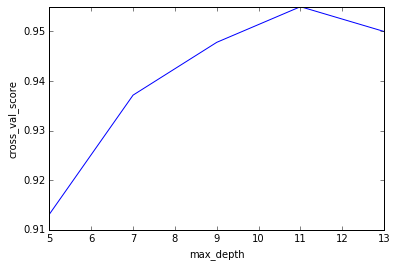

In [138]:
plt.plot(max_depth_range, answers)
plt.xlabel('max_depth')
plt.ylabel('cross_val_score')
plt.show()

In [140]:
answers = '2 3 4 7'
write_answer(5, answers)